<a href="https://colab.research.google.com/github/aiformankind/covid-19-hackathon/blob/master/Baby_Births_USA_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baby Births Data Exploration

With the spread of Coronavirus, I am interested in exploring the number of births across counties and states. This allows us to understand the projection of number of pregnant women giving births in upcoming months across counties/states during this difficult time of Coronavirus outbreak. Hope this will help hospitals to plan accordingly.

Data source: https://wonder.cdc.gov/natality-current.html

In [51]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

In [0]:
import pandas as pd
baby_df = pd.read_csv('https://raw.githubusercontent.com/aiformankind/covid-19-hackathon/master/Natality_2007-2018_state_county.txt', sep='\t')

In [53]:
baby_df

,Notes,State,State Code,County,County Code,Year,Year Code,Month,Month Code,Births,Average Birth Weight,Average Age of Mother
0,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2018.0,2018.0,January,1.0,164,3272.56,27.29
1,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2018.0,2018.0,February,2.0,167,3329.14,27.42
2,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2018.0,2018.0,March,3.0,184,3312.30,28.96
3,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2018.0,2018.0,April,4.0,183,3216.21,27.21
4,NaN,Alabama,1.0,"Baldwin County, AL",1003.0,2018.0,2018.0,May,5.0,205,3253.51,27.96
...,...,...,...,...,...,...,...,...,...,...,...,...
7589,"10. Bronx, New York (FIPS code 36005) represen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7590,"11. Kings County, New York (FIPS code 36047) r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7591,"12. New York County, New York (FIPS code 36061...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7592,"13. Queens, New York (FIPS code 36081) represe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
baby_df = baby_df[baby_df.Births.str.match(r'\d')==True]

In [0]:
baby_df['Births']=pd.to_numeric(baby_df['Births'])

In [56]:
baby_df.dtypes

Notes                     object
State                     object
State Code               float64
County                    object
County Code              float64
Year                     float64
Year Code                float64
Month                     object
Month Code               float64
Births                     int64
Average Birth Weight      object
Average Age of Mother     object
dtype: object

In [57]:
baby_df.Year.unique()

array([2018.])

In [58]:
baby_df.columns

Index(['Notes', 'State', 'State Code', 'County', 'County Code', 'Year',
       'Year Code', 'Month', 'Month Code', 'Births', 'Average Birth Weight',
       'Average Age of Mother'],
      dtype='object')

In [0]:
baby_by_state = baby_df.groupby(['State'])['Births'].sum()
sorted_baby_by_state = baby_by_state.sort_values(ascending = False)

**California has the largest number of births in the USA, followed by Texas and New York.**

(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 <a list of 6 Text major ticklabel objects>)

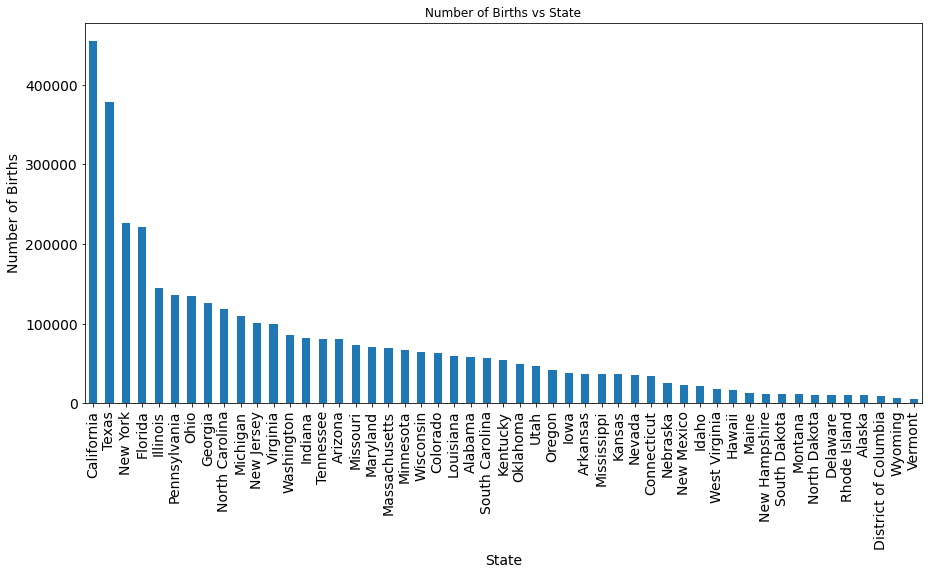

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sorted_baby_by_state.plot.bar(ax=ax)
ax.set_xlabel('State', fontsize=14)
ax.set_title('Number of Births vs State')
ax.set_ylabel('Number of Births', fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

**July and August have the most number of births.**

In [61]:
baby_by_month = baby_df.groupby(['Month'])['Births'].sum()
baby_by_month

Month
April        298394
August       344750
December     310766
February     284250
January      314808
July         329009
June         314816
March        316044
May          320622
November     308703
October      326778
September    322772
Name: Births, dtype: int64

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]), <a list of 9 Text major ticklabel objects>)

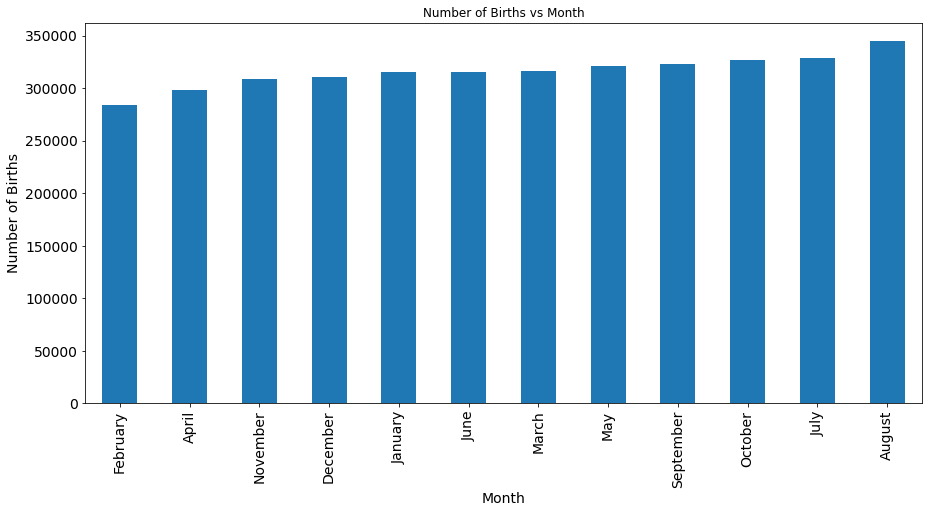

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
#sorted_icu_beds_grouped_by_county.iloc[0:15].plot.bar(ax=ax)
baby_by_month.sort_values(ascending=True).plot.bar(ax=ax)
ax.set_xlabel('Month', fontsize=14)
ax.set_title('Number of Births vs Month')
ax.set_ylabel('Number of Births', fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

In [63]:
baby_by_state_county_month = baby_df.groupby(['State','County','Month'], as_index=False)['Births'].sum()
baby_by_state_county_month

,State,County,Month,Births
0,Alabama,"Baldwin County, AL",April,183
1,Alabama,"Baldwin County, AL",August,202
2,Alabama,"Baldwin County, AL",December,193
3,Alabama,"Baldwin County, AL",February,167
4,Alabama,"Baldwin County, AL",January,164
...,...,...,...,...
7507,Wyoming,"Unidentified Counties, WY",March,560
7508,Wyoming,"Unidentified Counties, WY",May,609
7509,Wyoming,"Unidentified Counties, WY",November,514
7510,Wyoming,"Unidentified Counties, WY",October,542


**For California in the month of March, Los Angeles County has the most Births, 9315**

**Santa Clara County has 1750 Births in March**

In [64]:
baby_california_march = baby_by_state_county_month[(baby_by_state_county_month['State'] == 'California') & (baby_by_state_county_month['Month'] == 'March')]
baby_california_march_sorted = baby_california_march[['County','Births']].sort_values(by='Births',ascending=False)
baby_california_march_sorted

,County,Births
499,"Los Angeles County, CA",9315
631,"San Diego County, CA",3321
571,"Orange County, CA",2955
619,"San Bernardino County, CA",2489
595,"Riverside County, CA",2295
703,"Santa Clara County, CA",1750
607,"Sacramento County, CA",1602
391,"Alameda County, CA",1484
439,"Fresno County, CA",1169
415,"Contra Costa County, CA",1069


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 6 Text major ticklabel objects>)

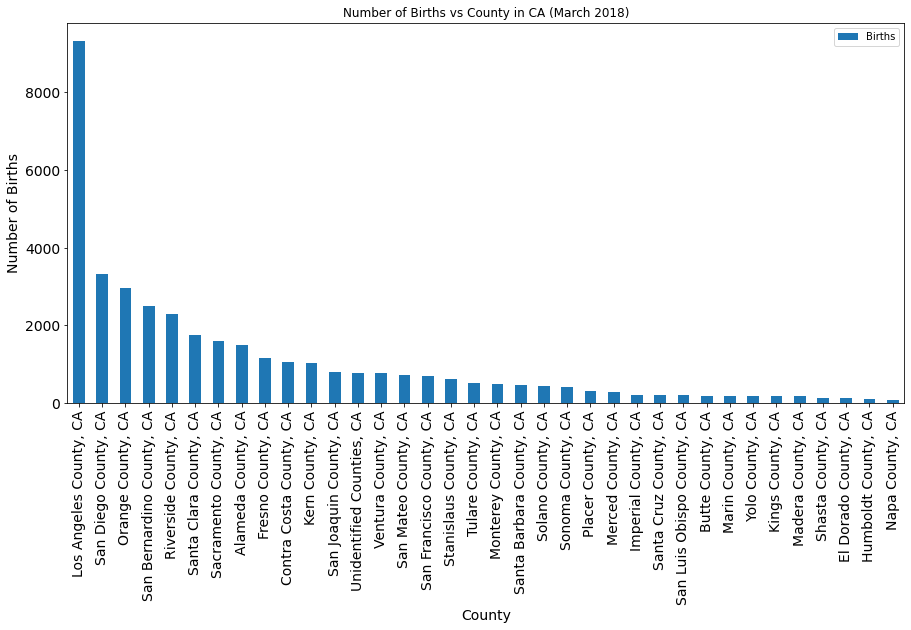

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
baby_california_march_sorted.plot.bar(x='County', ax=ax)
ax.set_xlabel('County', fontsize=14)
ax.set_title('Number of Births vs County in CA (March 2018)')
ax.set_ylabel('Number of Births', fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

In [66]:
!pip install ipywidgets

This is a great resource on using widgets.
https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916

We adapted and used some sample codes from the article.

In [0]:
ALL = 'ALL'
def prepare_list(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [68]:
from ipywidgets import interact
import ipywidgets as widgets

output = widgets.Output()
dropdown_state = widgets.Dropdown(options = prepare_list(baby_by_state_county_month.State))
dropdown_month = widgets.Dropdown(options = prepare_list(baby_by_state_county_month.Month))


def common_filtering(state_province, month):
    output.clear_output()
    
    if (state_province == ALL) & (month == ALL):
        common_filter =  baby_by_state_county_month
    elif (state_province == ALL):
        common_filter = baby_by_state_county_month[baby_by_state_county_month.Month == month]
    elif (month == ALL):
        common_filter = baby_by_state_county_month[baby_by_state_county_month.State == state_province]
    else:
        common_filter = baby_by_state_county_month[(baby_by_state_county_month.Month == month) & (baby_by_state_county_month.State == state_province)]
    
    with output:
        display(common_filter)


def dropdown_state_eventhandler(change):
    common_filtering(change.new, dropdown_month.value)
def dropdown_month_eventhandler(change):
    common_filtering(dropdown_state.value, change.new)

    
dropdown_state.observe(
dropdown_state_eventhandler, names='value')
dropdown_month.observe(
dropdown_month_eventhandler, names='value')   
input_widgets = widgets.HBox(
[dropdown_state, dropdown_month])
display(input_widgets)

       

Use the dropdown boxes above to select the State and month to query the data.

In [69]:
display(output)  

Output()

In [70]:
baby_by_state_month = baby_df.groupby(['State','Month'])['Births'].sum()
baby_by_state_month

State    Month    
Alabama  April        4393
         August       5275
         December     4961
         February     4342
         January      4902
                      ... 
Wyoming  March         560
         May           609
         November      514
         October       542
         September     543
Name: Births, Length: 612, dtype: int64